In [1]:
# import and constants div
from math import inf, log2, ceil, floor
from prettytable import PrettyTable
IHT19_1_EXAMPLE = [43.4, 43.5, 43.7, 43.8, 43.9, 43.9, 43.9, 44.0, 44.0, 44.1,
           44.2, 44.2, 44.2, 44.3, 44.3, 44.3, 44.4, 44.5, 44.5, 44.5,
           44.6, 44.6, 44.7, 44.7, 44.8, 44.8, 44.8, 44.9, 44.9, 44.9,
           45.0, 45.0, 45.1, 45.2, 45.2, 45.2, 45.2, 45.2, 45.3, 45.3,
           45.3, 45.4, 45.4, 45.4, 45.4, 45.4, 45.4, 45.5, 45.5, 45.6,
           45.6, 45.6, 45.6, 45.6, 45.7, 45.7, 45.7, 45.7, 45.7, 45.7,
           45.8, 45.8, 45.9, 45.9, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0,
           46.1, 46.1, 46.1, 46.1, 46.2, 46.2, 46.2, 46.2, 46.2, 46.4,
           46.4, 46.4, 46.4, 46.4, 46.5, 46.5, 46.5, 46.6, 46.7, 46.7,
           46.7, 46.7, 46.7, 46.8, 46.9, 47.0, 47.1, 47.1, 47.2, 47.7
           ]
IHT19_1_30V = [88, 72, 100, 60, 116, 74, 36, 143, 114, 70,
               56, 75, 30, 76, 89, 53, 117, 90, 135, 103,
               35, 128, 71, 86, 43, 76, 61, 113, 34, 83,
               62, 84, 50, 69, 120, 91, 102, 47, 119, 99,
               33, 76, 91, 37, 85, 17, 85, 63, 121, 74,
               46, 85, 63, 104, 77, 92, 54, 78, 42, 105,
               85, 79, 49, 80, 93, 32, 106, 81, 64, 79,
               73, 19, 80, 65, 107, 123, 51, 94, 80, 108,
               52, 83, 124, 81, 96, 82, 109, 20, 95, 68,
               66, 41, 82, 98, 111, 67, 125, 97, 112, 58]

EPSILON = 0.0000001
FIRST = 0
LAST = -1


def round3(x):
    return round(x, 3)


In [2]:
# first calculatings

selection = IHT19_1_EXAMPLE
n = len(selection)

variation_series = sorted(selection)

discret_statictic_series = {}
for i in variation_series:
    if i in discret_statictic_series:
        discret_statictic_series[i] += 1
    else:
        discret_statictic_series[i] = 1


Expected_value = sum([value*(count/n)
                     for value, count in discret_statictic_series.items()])

Ranking = variation_series[LAST]-variation_series[FIRST]

D = sum([count*(value-Expected_value)**2 for value,
        count in discret_statictic_series.items()])/n
σ = D ** (1/2)

S = (n/(n-1)*D)**(1/2)


In [3]:
m = ceil(1+log2(n))
h = (max(variation_series)-min(variation_series))/m

intervals = [round3(variation_series[FIRST])]
while intervals[LAST]+h/2 < variation_series[LAST]:
    intervals.append(round3(intervals[LAST]+h))
    
    
frequencies = [FIRST]

intervals_iter = iter(intervals)
centre_of_the_gap = next(intervals_iter)
for i in variation_series:
    if abs(i-centre_of_the_gap) < h/2:
        frequencies[LAST] += 1
    else:
        frequencies.append(1)
        centre_of_the_gap = next(intervals_iter)

intervals_weight_normalized = [i/n for i in frequencies]
intervals_weight_normalized_based = [round3(sum(
    intervals_weight_normalized[:i+1])) for i in range(len(intervals_weight_normalized))]

interval_distribution = {}
for index in range(len(intervals)):
    interval = intervals[index]
    frequency = frequencies[index]
    interval_distribution[interval] = frequency


In [4]:
calculation_table = PrettyTable(["Intervals","x_i","f_i","w_i = f_i/n","w_i/h","(x)f_i","(x^2)f_i"])
value = 0
for index in range(len(intervals)):
    interval = intervals[index]
    frequency = frequencies[index]
    row = []
    row.append("[{};{})".format(round3(interval-h/2),round3(interval+h/2)))
    row.append(interval)
    row.append(frequency)
    row.append(round3(frequency/n))
    row.append(round3(frequency/n/h))
    row.append(round3(interval*frequency))
    row.append(round3(interval**2*frequency))
    calculation_table.add_row(row)
    
print(calculation_table)

+-----------------+--------+-----+-------------+-------+----------+-----------+
|    Intervals    |  x_i   | f_i | w_i = f_i/n | w_i/h |  (x)f_i  |  (x^2)f_i |
+-----------------+--------+-----+-------------+-------+----------+-----------+
| [43.131;43.669) |  43.4  |  2  |     0.02    | 0.037 |   86.8   |  3767.12  |
| [43.669;44.207) | 43.938 |  11 |     0.11    | 0.205 | 483.318  | 21236.026 |
| [44.207;44.745) | 44.476 |  11 |     0.11    | 0.205 | 489.236  |  21759.26 |
| [44.745;45.283) | 45.014 |  14 |     0.14    |  0.26 | 630.196  | 28367.643 |
| [45.283;45.821) | 45.552 |  24 |     0.24    | 0.447 | 1093.248 | 49799.633 |
| [45.821;46.359) | 46.09  |  17 |     0.17    | 0.316 |  783.53  | 36112.898 |
| [46.359;46.897) | 46.628 |  15 |     0.15    | 0.279 |  699.42  | 32612.556 |
| [46.897;47.435) | 47.166 |  5  |     0.05    | 0.093 |  235.83  | 11123.158 |
| [47.434;47.972) | 47.703 |  1  |     0.01    | 0.019 |  47.703  |  2275.576 |
+-----------------+--------+-----+------

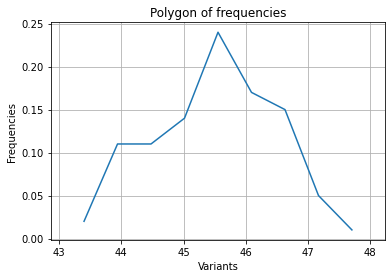

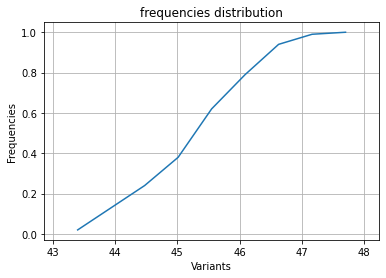

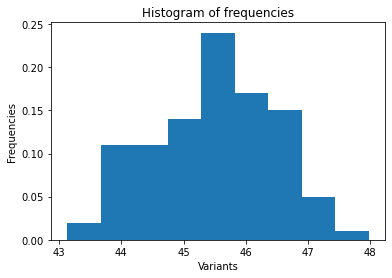

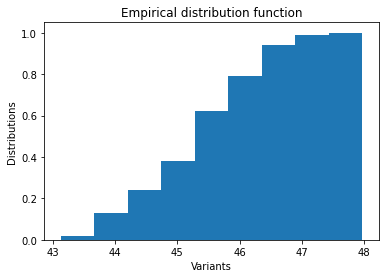

In [5]:
# plotting
import matplotlib.pyplot as plt

plt.plot(intervals, intervals_weight_normalized)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('Polygon of frequencies')
plt.grid()
plt.show()

plt.plot(intervals, intervals_weight_normalized_based)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('frequencies distribution')
plt.grid()
plt.show()

plt.bar(intervals, intervals_weight_normalized, width=h)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('Histogram of frequencies')
plt.show()

plt.bar(intervals, intervals_weight_normalized_based, width=h)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Distributions')
plt.xlabel('Variants')
plt.title('Empirical distribution function')
plt.show()


In [6]:
sample_average = sum([value*frequency for value,frequency in interval_distribution.items()])/n
sample_dispersion = sum([(value**2)*frequency for value,frequency in interval_distribution.items()])/n-sample_average*sample_average
standard_deviation = sample_dispersion**(1/2)
fixed_dispertion = (n/(n-1))*sample_dispersion
fixed_deviation = fixed_dispertion**(1/2)

In [7]:
#Looking for theoretic frequencies


interval_distribution_list = [[(round3(value-h/2),round3(value+h/2)),frequency]for value,frequency in sorted(interval_distribution.items())]
prepared_interval_distribution = []
LEFT=0
RIGHT=1
INTERVAL = 0
FREQUENCY = 1


#uniting interval with small frequencies
left_border = interval_distribution_list[FIRST][INTERVAL][LEFT]
temp_frequency = 0
for [interval,frequency] in interval_distribution_list:
    if frequency+temp_frequency<5:
        temp_frequency += frequency
        continue
    prepared_interval_distribution.append([(left_border,interval[RIGHT]),frequency+temp_frequency])
    left_border = interval[RIGHT]
    temp_frequency = 0

if temp_frequency > 0:
    prepared_interval_distribution[-1] = [(prepared_interval_distribution[-1][INTERVAL][LEFT],interval_distribution_list[-1][INTERVAL][RIGHT]),prepared_interval_distribution[-1][FREQUENCY]+temp_frequency]

differences_from_sample_average = []
for [interval,frequency] in prepared_interval_distribution:
    differences_from_sample_average.append([round3(interval[LEFT]-sample_average),round3(interval[RIGHT]-sample_average)])
differences_from_sample_average[FIRST][LEFT]=-inf
differences_from_sample_average[LAST][RIGHT]=inf

z_intervals = []
for [left,right] in differences_from_sample_average:
    z_intervals.append([round3(left/standard_deviation),round3(right/standard_deviation)])

intermediate_table = PrettyTable(["i","x_i","x_i+1","(x_i-ax)","(x_(i+1)-ax","z_i=(x_i-ax)/o","z_(i+1)=(x_(i+1)-ax)/o"])
for i in range(len(prepared_interval_distribution)):
    row = []
    row.append(i+1)
    row.append(prepared_interval_distribution[i][INTERVAL][LEFT])
    row.append(prepared_interval_distribution[i][INTERVAL][RIGHT])
    row.append(differences_from_sample_average[i][LEFT])
    row.append(differences_from_sample_average[i][RIGHT])
    row.append(z_intervals[i][LEFT])
    row.append(z_intervals[i][RIGHT])
    intermediate_table.add_row(row)
    
    
print(intermediate_table)


        

+---+--------+--------+----------+-------------+----------------+------------------------+
| i |  x_i   | x_i+1  | (x_i-ax) | (x_(i+1)-ax | z_i=(x_i-ax)/o | z_(i+1)=(x_(i+1)-ax)/o |
+---+--------+--------+----------+-------------+----------------+------------------------+
| 1 | 43.131 | 44.207 |   -inf   |    -1.286   |      -inf      |         -1.324         |
| 2 | 44.207 | 44.745 |  -1.286  |    -0.748   |     -1.324     |         -0.77          |
| 3 | 44.745 | 45.283 |  -0.748  |    -0.21    |     -0.77      |         -0.216         |
| 4 | 45.283 | 45.821 |  -0.21   |    0.328    |     -0.216     |         0.338          |
| 5 | 45.821 | 46.359 |  0.328   |    0.866    |     0.338      |         0.892          |
| 6 | 46.359 | 46.897 |  0.866   |    1.404    |     0.892      |         1.446          |
| 7 | 46.897 | 47.972 |  1.404   |     inf     |     1.446      |          inf           |
+---+--------+--------+----------+-------------+----------------+------------------------+

In [8]:

from scipy.stats import norm
from math import inf

def Laplace(x):
    return norm.cdf(x)-0.5

calculation_table = PrettyTable(["i","z_i","z_(i+1)","Ф(z_i)","Ф(z_(i+1))","P_i=Ф(z_(i+1))-Ф(z_i)","n'_i=100P_i"])


theoretical_propably_list = [(Laplace(z_intervals[i][RIGHT])-Laplace(z_intervals[i][LEFT]))*n for i in range(len(z_intervals))]
for i in range(len(z_intervals)):
    row = []
    row.append(i+1)
    row.append(z_intervals[i][LEFT])
    row.append(z_intervals[i][RIGHT])
    row.append(Laplace(z_intervals[i][LEFT]))
    row.append(Laplace(z_intervals[i][RIGHT]))
    row.append(theoretical_propably_list[i])
    row.append(theoretical_propably_list[i]*100)
    calculation_table.add_row(row)
    
print(calculation_table)

+---+--------+---------+----------------------+----------------------+-----------------------+--------------------+
| i |  z_i   | z_(i+1) |        Ф(z_i)        |      Ф(z_(i+1))      | P_i=Ф(z_(i+1))-Ф(z_i) |    n'_i=100P_i     |
+---+--------+---------+----------------------+----------------------+-----------------------+--------------------+
| 1 |  -inf  |  -1.324 |         -0.5         | -0.40724847764324723 |   9.275152235675277   | 927.5152235675276  |
| 2 | -1.324 |  -0.77  | -0.40724847764324723 | -0.2793500536573504  |   12.789842398589684  | 1278.9842398589685 |
| 3 | -0.77  |  -0.216 | -0.2793500536573504  | -0.08550612621755599 |   19.38439274397944   | 1938.439274397944  |
| 4 | -0.216 |  0.338  | -0.08550612621755599 | 0.13231840611135004  |   21.782453232890603  | 2178.2453232890603 |
| 5 | 0.338  |  0.892  | 0.13231840611135004  |  0.313803533802576   |   18.148512769122593  | 1814.8512769122594 |
| 6 | 0.892  |  1.446  |  0.313803533802576   | 0.42591139909223763  |  

In [9]:
frequency_table = PrettyTable(["i","n_i","n'_i","n_i-n'_i","(n_i-n'_i)^2","((n_i-n'_i)^2)/n_i","(n_i)^2","((n_i)^2)/n'_i"])

Sn_i = 0
Sn__i = 0
Hi_empiric = 0

for i in range(len(z_intervals)):
    row = []
    row.append(i+1)
    row.append(prepared_interval_distribution[i][FREQUENCY])
    Sn_i += prepared_interval_distribution[i][FREQUENCY]
    row.append(theoretical_propably_list[i])
    Sn__i += theoretical_propably_list[i]
    row.append(prepared_interval_distribution[i][FREQUENCY]-theoretical_propably_list[i])
    row.append((prepared_interval_distribution[i][FREQUENCY]-theoretical_propably_list[i])**2)
    row.append(((prepared_interval_distribution[i][FREQUENCY]-theoretical_propably_list[i])**2)/prepared_interval_distribution[i][FREQUENCY])
    Hi_empiric += ((prepared_interval_distribution[i][FREQUENCY]-theoretical_propably_list[i])**2)/prepared_interval_distribution[i][FREQUENCY]
    row.append(prepared_interval_distribution[i][FREQUENCY]**2)
    row.append((prepared_interval_distribution[i][FREQUENCY]**2)/theoretical_propably_list[i])
    frequency_table.add_row(row)
    
print(Sn_i)
print(Sn__i)
print(Hi_empiric)
print(frequency_table)

100
100.0
4.999846859959803
+---+-----+--------------------+---------------------+--------------------+---------------------+---------+--------------------+
| i | n_i |        n'_i        |       n_i-n'_i      |    (n_i-n'_i)^2    |  ((n_i-n'_i)^2)/n_i | (n_i)^2 |   ((n_i)^2)/n'_i   |
+---+-----+--------------------+---------------------+--------------------+---------------------+---------+--------------------+
| 1 |  13 | 9.275152235675277  |  3.724847764324723  | 13.874490867394888 |  1.0672685282611452 |   169   | 18.220725191978044 |
| 2 |  11 | 12.789842398589684 |  -1.789842398589684 | 3.2035358117892736 | 0.29123052834447943 |   121   | 9.460632604303434  |
| 3 |  14 | 19.38439274397944  |  -5.38439274397944  | 28.991685221418443 |  2.0708346586727457 |   196   | 10.111227242900103 |
| 4 |  24 | 21.782453232890603 |  2.217546767109397  | 4.917513664317338  | 0.20489640267988907 |   576   | 26.44330249864895  |
| 5 |  17 | 18.148512769122593 | -1.1485127691225934 | 1.319081580837

In [10]:
k = len(theoretical_propably_list) - 2 - 1

Hi_theoretic = 11.1


print("So {} < {} then hypothesis about normal distribution is right".format(round3(Hi_empiric),Hi_theoretic))

So 5.0 < 11.1 then hypothesis about normal distribution is right


In [11]:
t_y = 2.13

delta = fixed_deviation/(n**(1/2))*t_y
q = 0.143

print("confidence interval a is [ {} ; {} ]".format(sample_average-delta,sample_average+delta))
print("confidence interval deviation is [ {} ; {} ]".format(fixed_deviation*(1-q),fixed_deviation*(1+q)))

confidence interval a is [ 45.28493465884471 ; 45.7006853411553 ]
confidence interval deviation is [ 0.8363810674651879 ; 1.1155000701431854 ]
